# Statistics

In [7]:
import pandas as pd
games_df = pd.read_csv("games.csv")
rounds_df = pd.read_csv("rounds_in_games.csv")

## Words


Distribution of words by number of letters.

In [8]:
words_df = pd.DataFrame(rounds_df["word"])
words_df["word_length"] = words_df["word"].apply(len)
word_length_distribution = (
    words_df.groupby("word_length").size().reset_index(name="count")
)
print(word_length_distribution)

   word_length  count
0            5      2
1            6      2
2            7      1
3            9      4


## Rounds

Number of distinct users who have played.

In [9]:
distinct_usernames = games_df["username"].unique()
print(len(distinct_usernames))

2


Top 5 players by rounds won per game.

In [10]:
rounds_won_per_game = (
    rounds_df.groupby(["game_id", "username"]).agg({"victory": "sum"}).reset_index()
)

average_rounds_won = (
    rounds_won_per_game.groupby("username")["victory"].mean().reset_index()
)

top_players = average_rounds_won.nlargest(5, "victory")

print(top_players)

  username  victory
0    luigi      2.0
1      zen      1.0


## Game

Top 5 players by final score.

In [11]:
top_players = games_df.sort_values(by="final_score", ascending=False).head(5)[
    ["username", "final_score"]
]

print(top_players)

  username  final_score
2    luigi            3
0      zen            1
1    luigi            1


Top 5 users by mean score.

In [12]:
average_score_per_user = (
    games_df.groupby("username")["final_score"].mean().reset_index()
)

top_users = average_score_per_user.nlargest(5, "final_score")

print(top_users)

  username  final_score
0    luigi          2.0
1      zen          1.0


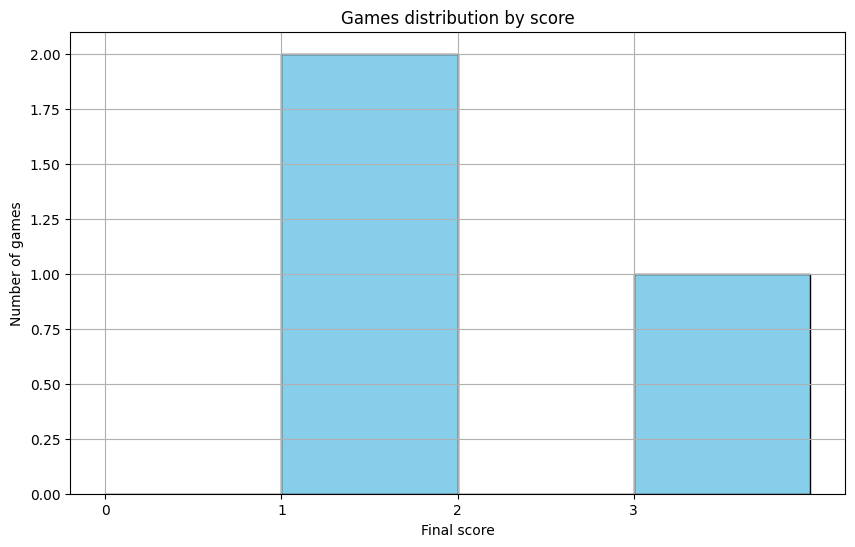

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(
    games_df["final_score"], bins=[0, 1, 2, 3, 4], color="skyblue", edgecolor="black"
)

plt.title("Games distribution by score")
plt.xlabel("Final score")
plt.ylabel("Number of games")

plt.xticks(range(4))

plt.grid(True)
plt.show()